<a href="https://colab.research.google.com/github/jr2950499/KESB/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#재고관리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/code2024/Session08 - 유형별로 실습하는 딥러닝

/content/drive/MyDrive/Colab Notebooks/code2024/Session08 - 유형별로 실습하는 딥러닝


In [ ]:
import pandas as pd
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")

In [ ]:
import pandas as pd
import numpy as np

### A. 데이터 전처리

###1. 데이터타입 통합 및 특성숫자 변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
hclusScaler= MinMaxScaler()

In [ ]:
featuresData.loc[: "HCLUS"]

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HO,LE_PROMO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,0,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,0,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,0,1


In [ ]:
hclusScaler= MinMaxScaler()
featuresData["SE_HCLUS"]= hclusScaler.fit_transform(featuresData[["HCLUS"]])

In [ ]:
hclusScaler

MinMaxScaler()

In [ ]:
features

['LE_HO', 'HCLUS', 'YEAR', 'WEEK', 'PRO_PERCENT', 'LE_PROMO', 'YEARWEEK']

In [ ]:
yearweekScaler= MinMaxScaler()
featuresData["SE_YEARWEEK"]= yearweekScaler.fit_transform(featuresData[["YEARWEEK"]])

promoScaler= MinMaxScaler()
featuresData["SE_PROMO"]= promoScaler.fit_transform(featuresData[["PRO_PERCENT"]])

weekScaler= MinMaxScaler()
featuresData["SE_WEEK"]= weekScaler.fit_transform(featuresData[["WEEK"]])

yearScaler= MinMaxScaler()
featuresData["SE_YEAR"]= yearScaler.fit_transform(featuresData[["YEAR"]])


In [ ]:
def scaleFuc(inValue):
    return inValue/ maxYearweek

In [ ]:
maxYearweek= featuresData.YEARWEEK.max()
featuresData.YEARWEEK.apply(scaleFuc)

0      0.999251
1      0.999256
2      0.999261
3      0.999266
4      0.999271
         ...   
100    0.999980
101    0.999985
102    0.999990
103    0.999995
104    1.000000
Name: YEARWEEK, Length: 105, dtype: float64

In [ ]:
### Holiday->promotion y -> 1 n ->0

In [ ]:
ynLabelEncoder= LabelEncoder()   #초기화 시킨거임

In [ ]:
featuresData.HOLIDAY.drop_duplicates()  #중복값 제거

0    Y
1    N
Name: HOLIDAY, dtype: object

In [ ]:
featuresData["LE_HO"]= ynLabelEncoder.fit_transform(featuresData.HOLIDAY)  #벡터화 한다 , 숫자화한다
featuresData["LE_PROMO"]= ynLabelEncoder.fit_transform(featuresData.PROMOTION)

### 2. 데이터 분리

In [ ]:
stdRatio =0.8
stdIndex = featuresData.shape[0] * stdRatio

In [ ]:
sortKey = ["REGIONID", "ITEM", "YEARWEEK"]
featuresData= featuresData.sort_values(sortKey, ignore_index = True)
stdYearweek = featuresData.loc[stdIndex, ["YEARWEEK"]].values[0]   #index c행, 컬럼
stdYearweek

201632

In [ ]:
exceptFeatures = ["HCLUS", "YEARWEEK", "YEAR", "PRO_PERCENT", "WEEK"]

In [ ]:
label = ["QTY"]

In [ ]:
features = \
list( set(featuresData.select_dtypes(np.number).columns)-set(label) )  #숫자형 컬럼만 선택해주는것
features

['LE_HO',
 'SE_YEARWEEK',
 'HCLUS',
 'YEAR',
 'WEEK',
 'PRO_PERCENT',
 'SE_PROMO',
 'SE_HCLUS',
 'SE_WEEK',
 'LE_PROMO',
 'YEARWEEK',
 'SE_YEAR']

In [ ]:
features = list(set(featuresData.select_dtypes(np.number).columns)- set (label))
features = list(set(features)-set(exceptFeatures))
features

['LE_HO',
 'SE_YEARWEEK',
 'SE_PROMO',
 'SE_HCLUS',
 'SE_WEEK',
 'LE_PROMO',
 'SE_YEAR']

In [ ]:
trainingDataFeatures = featuresData.loc[featuresData.YEARWEEK <=stdYearweek, features]
trainingDataLabel = featuresData.loc[featuresData.YEARWEEK <=stdYearweek, label]
testDataFeatures = featuresData.loc[featuresData.YEARWEEK <=stdYearweek, features]
testDataLabel = featuresData.loc[featuresData.YEARWEEK <=stdYearweek, label]

In [ ]:
print(trainingDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataFeatures.shape)
print(testDataLabel.shape)

(85, 7)
(85, 1)
(85, 7)
(85, 1)


B.모델생성

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense   #동그라미 그리는거?
from tensorflow.keras import Sequential #밑으로 쌓아가겠다.

In [ ]:
inputShape = trainingDataFeatures.loc[0].shape

In [ ]:
model = Sequential()
#input Layer
model.add( Dense(units=8,activation="relu", input_shape = inputShape))

#hidden Layer
model.add( Dense(units=8, activation="relu"))

#output Layer
model.add( Dense(units=1, activation="relu"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 64        
                                                                 
 dense_21 (Dense)            (None, 8)                 72        
                                                                 
 dense_22 (Dense)            (None, 1)                 9         
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

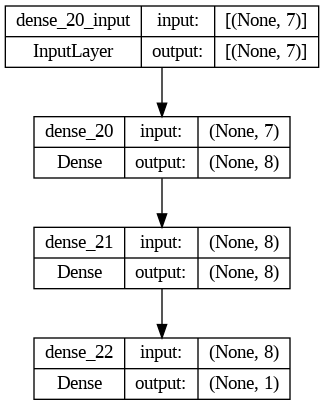

In [ ]:
plot_model(model, show_shapes=True)

##2.모델 컴파일

In [ ]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error","mean_absolute_error"])  #내 모델의 안정성을 보기 위하여

##3. 모델훈련

In [ ]:
model.fit(x=trainingDataFeatures, y = trainingDataLabel, batch_size=32, epochs=1000, validation_split=0.2)

Epoch 1/1000
3/3 [==============================] - 1s 156ms/step - loss: 1926123.3750 - mean_squared_error: 1926123.3750 - mean_absolute_error: 1107.7446 - val_loss: 2063657.8750 - val_mean_squared_error: 2063657.8750 - val_mean_absolute_error: 1226.7634
Epoch 2/1000
3/3 [==============================] - 0s 37ms/step - loss: 1926069.2500 - mean_squared_error: 1926069.2500 - mean_absolute_error: 1107.7245 - val_loss: 2063633.6250 - val_mean_squared_error: 2063633.6250 - val_mean_absolute_error: 1226.7538
Epoch 3/1000
3/3 [==============================] - 0s 36ms/step - loss: 1926017.3750 - mean_squared_error: 1926017.3750 - mean_absolute_error: 1107.7040 - val_loss: 2063606.3750 - val_mean_squared_error: 2063606.3750 - val_mean_absolute_error: 1226.7432
Epoch 4/1000
3/3 [==============================] - 0s 36ms/step - loss: 1925965.3750 - mean_squared_error: 1925965.3750 - mean_absolute_error: 1107.6831 - val_loss: 2063577.0000 - val_mean_squared_error: 2063577.0000 - val_mean_absol

In [ ]:
trainingDataFeatures.describe()

,LE_HO,SE_YEARWEEK,SE_PROMO,SE_HCLUS,SE_WEEK,LE_PROMO,SE_YEAR
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.376471,0.395325,0.428173,0.711765,0.423982,0.729412,0.376471
std,0.487376,0.302239,0.278877,0.380917,0.276219,0.446900,0.487376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.139073,0.000000,0.250000,0.192308,0.000000,0.000000
50%,0.000000,0.278146,0.496439,1.000000,0.403846,1.000000,0.000000
75%,1.000000,0.728477,0.563581,1.000000,0.596154,1.000000,1.000000
max,1.000000,0.867550,0.847406,1.000000,1.000000,1.000000,1.000000


In [ ]:
features

['LE_HO',
 'SE_YEARWEEK',
 'SE_PROMO',
 'SE_HCLUS',
 'SE_WEEK',
 'LE_PROMO',
 'SE_YEAR']

In [ ]:
#1.대휴일 #4.소휴일
inHclus = inHclus/ hclusScaler.data_max_[0]
inWeek = inWeek/ weekScaler.data_max_[0]
inYearweek = inYearweek/ yearweekScaler.data_max_[0]
inHo =inHo
inPro= inPro
inYear =inYear/ yearScaler.data_max_[0]
inPromotion=inPromotion/promoScaler.data_max_[0]

In [ ]:
inDf= pd.DataFrame([[inHclus, inWeek, inYearweek, inHo, inPro, inYear, inPromotion]])

In [ ]:
model.predict(inDf)

1/1 [==============================] - 0s 57ms/step


array([[92986104.]], dtype=float32)

3/3 [==============================] - 0s 3ms/step


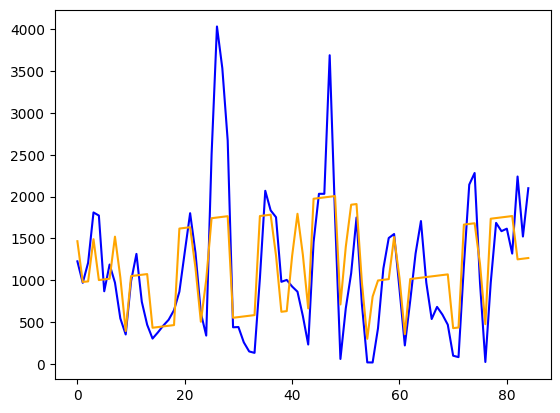

In [ ]:
predictValue = model.predict(testDataFeatures)

testDataLabel["DNN_PREDICT"] = predictValue

# MAPE 활용 ACCURACY = 1-ABS(ACT-FCST)/ACT
# 과다에측하는 곳에 DISADVATAGE를 준다
# MAPE 활용 ACCURACY = 1-ABS(FCST-ACT)/FCST
# 과다예측한 곳에 정확도를 주고 소량예측에는 DISADVANTAGE를 준다.

testDataLabel["ACCURACY"] = 1-abs(testDataLabel.QTY - testDataLabel.DNN_PREDICT)/testDataLabel.QTY

testDataLabel.loc[testDataLabel.ACCURACY < 0, ["ACCURACY"]]=0

testDataLabel.ACCURACY.mean()#0.64정도는 나와야되는디 ㅋㅋ;

import matplotlib.pyplot as plt

plt.plot(testDataLabel.index, testDataLabel.QTY, color='blue')
plt.plot(testDataLabel.index, testDataLabel.DNN_PREDICT, color='orange')